In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import collections

In [22]:
df = pd.read_csv("disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [2]:
df.shape

(1368, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [4]:
df.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [5]:
df.nunique()

show_id         1368
type               2
title           1368
director         578
cast            1132
country           87
date_added       150
release_year      90
rating             9
duration         156
listed_in        317
description     1366
dtype: int64

In [8]:
df = df[df['cast'].notna()]
df['cast'].isna().sum()

0

In [9]:
df.isnull().sum()

show_id           0
type              0
title             0
director        361
cast              0
country         127
date_added        3
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [11]:
Questions = ["1. What are the most common types of content (Movies vs. TV Shows)?",
"2. Which countries are producing the most content, and is there a trend over time?",
"3. How are content ratings distributed across movies and TV shows?",
"4. Which directors and actors are most frequently associated with highly rated or popular content?",
"5. What is the typical duration of movies compared to TV shows, and how does this vary by genre or country?",
"6. What are the release trends over time, and are there any noticeable patterns in the types of content released?",
"7. How do descriptions correlate with genres or content types, and are there common themes in popular shows?"]

Questions


['1. What are the most common types of content (Movies vs. TV Shows)?',
 '2. Which countries are producing the most content, and is there a trend over time?',
 '3. How are content ratings distributed across movies and TV shows?',
 '4. Which directors and actors are most frequently associated with highly rated or popular content?',
 '5. What is the typical duration of movies compared to TV shows, and how does this vary by genre or country?',
 '6. What are the release trends over time, and are there any noticeable patterns in the types of content released?',
 '7. How do descriptions correlate with genres or content types, and are there common themes in popular shows?']

#### 1. What are the most common types of content (Movies vs. TV Shows)?

In [12]:
# Count the number of Movies vs. TV Shows
content_type_counts = df['type'].value_counts()
print(content_type_counts)

type
Movie      881
TV Show    313
Name: count, dtype: int64


Text(0, 0.5, 'Amount')

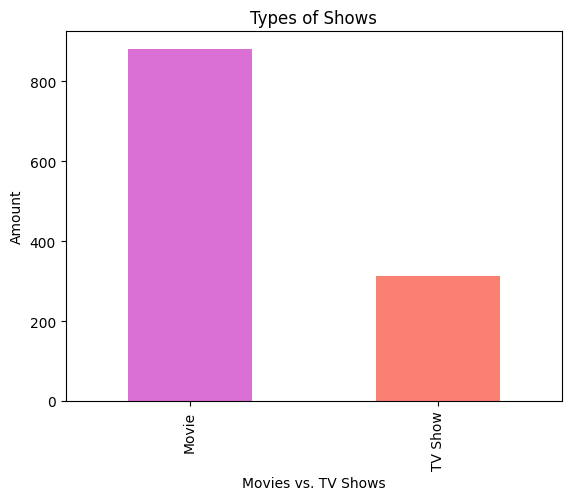

In [13]:
content_type_counts.plot(kind = "bar", color=["orchid", "salmon"])
plt.title("Types of Shows")
plt.xlabel("Movies vs. TV Shows")
plt.ylabel("Amount")

#### As we can see that Movies are the most common type of content

#### 2. Which countries are producing the most content, and is there a trend over time?

In [30]:
collections.Counter(df['country']).most_common(5)

[('United States', 976),
 (nan, 175),
 ('United States, Canada', 28),
 ('United Kingdom', 23),
 ('United States, United Kingdom', 19)]

##### we can see we have columns with mixed county names so we will first split the values and then count it, and then plot it to see the result.

In [25]:
# Split countries by comma, flatten the list, and count occurrences
country_list = df['country'].dropna().str.split(',').sum()
country_list = [country.strip() for country in country_list]
country_counts = collections.Counter(country_list)

# Convert to DataFrame for easier plotting
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
country_df = country_df.sort_values(by='Count', ascending=False)

#### now we plot the Bar Graph to see which country produces the most content

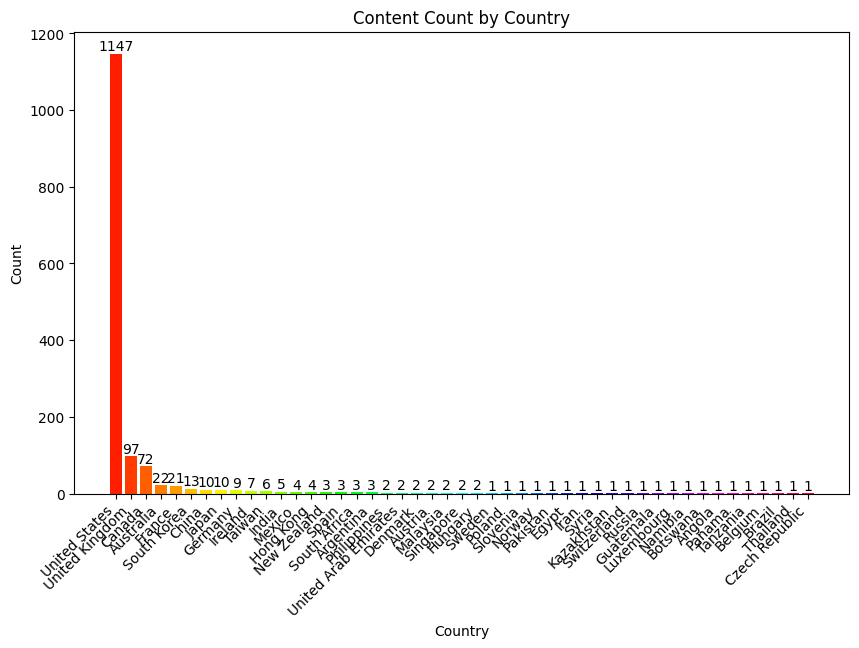

In [68]:
# Set a color palette with different colors for each bar
colors = sns.color_palette("hsv", len(country_df))

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(country_df['Country'], country_df['Count'], color=colors)

# Adding the count values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

# Labeling the plot
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Content Count by Country')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

#### as we can see United States produces the most content over time

### now we will check is there a trend over time or not, by plotting a Line Graph

<Figure size 1000x600 with 0 Axes>

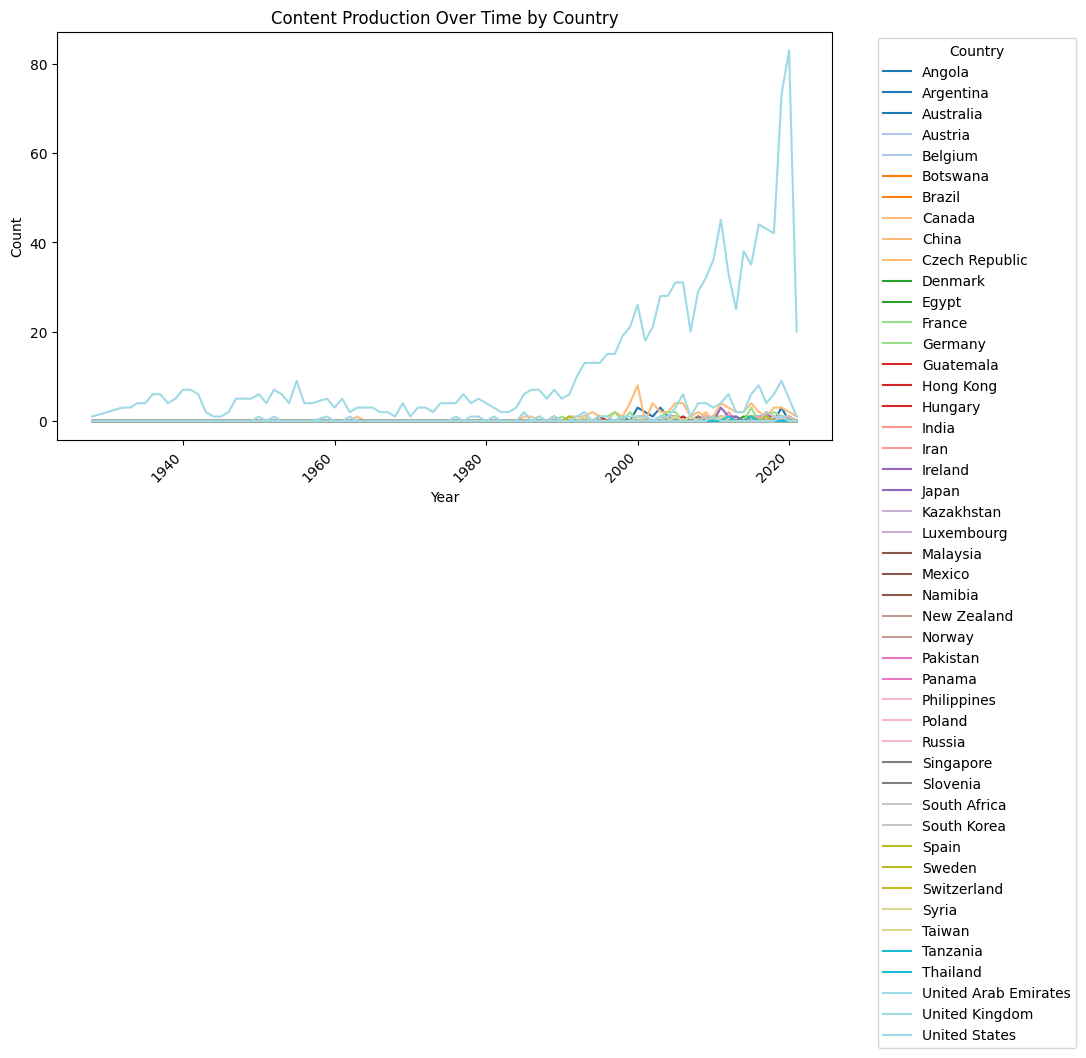

In [70]:
# Ensure 'release_year' is in datetime format (if not already)
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Split countries by comma and explode the DataFrame to have one country per row
df['country'] = df['country'].str.split(',')
df = df.explode('country')
df['country'] = df['country'].str.strip()  # Remove any leading/trailing whitespace

# Group by 'release_year' and 'country', then count occurrences
country_trend = df.groupby(['release_year', 'country']).size().unstack(fill_value=0)

# Plot the trend over time by country
plt.figure(figsize=(10, 6))
country_trend.plot(title='Content Production Over Time by Country', colormap='tab20', figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

#### we can see that United States did quite a great job over time

### 3. How are content ratings distributed across movies and TV shows?

In [34]:
# Distribution of ratings
rating_distribution = df.groupby(['type', 'rating']).size().unstack(fill_value=0)
rating_distribution

rating,G,PG,PG-13,TV-14,TV-G,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
type,,,,,,,,,
Movie,235,226,60,36,224,165,2,36,6
TV Show,0,1,0,36,83,110,46,94,6


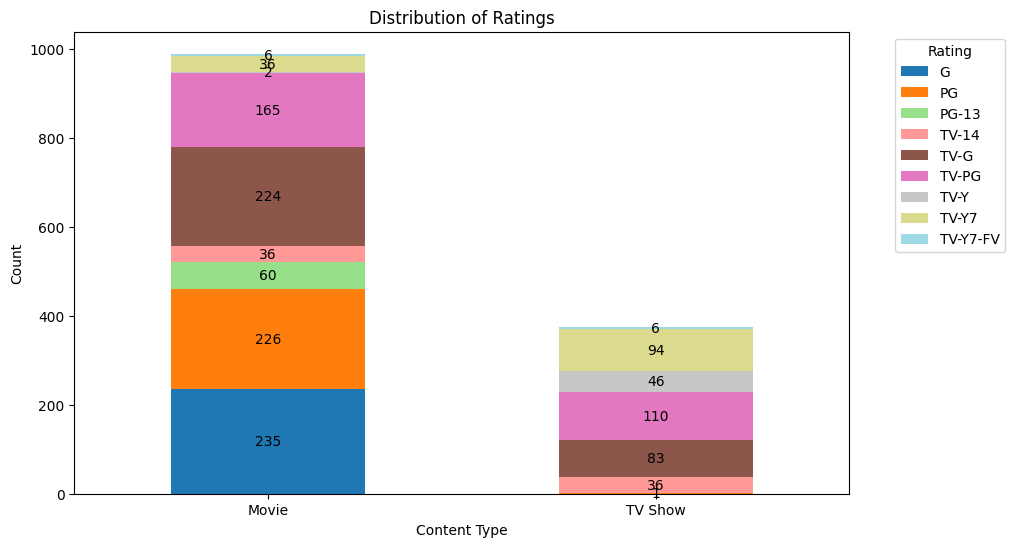

In [81]:
# Plot the distribution as a stacked bar chart using raw counts instead of percentages
ax = rating_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20', title='Distribution of Ratings')

# Annotate each bar with the count value
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Avoid plotting zeroes
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center', fontsize=10, color='black')

# Labeling the plot
ax.set_xlabel('Content Type')
ax.set_ylabel('Count')
plt.xticks(rotation=0)  # Keep x labels horizontal for readability
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### we can see the most Movie made was "G" rated and the most TV Shows was "TV PG" rated

### 4. Which directors and actors are most frequently associated with highly rated or popular content?

#### for this we are going to check top 10 Directors

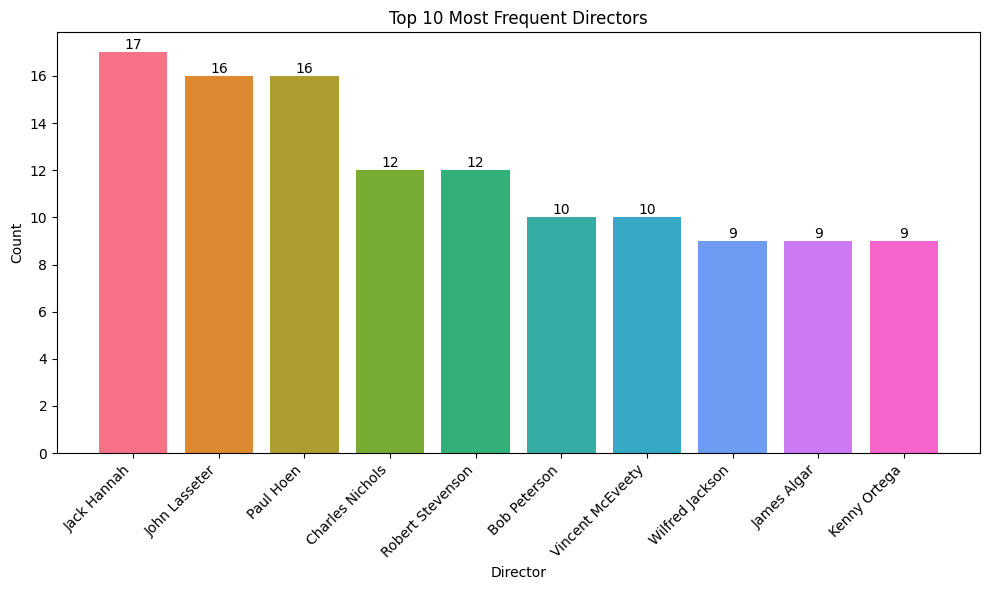

In [56]:
# Count the most frequent directors
top_directors = df['director'].value_counts().head(10)

# Set a color palette with different colors for each bar
colors = sns.color_palette('husl', len(top_directors))

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(top_directors.index, top_directors.values, color=colors)

# Annotating the bars with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, color='black')

# Labeling the plot
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Directors')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()



#### As we can see through the visualisation "Jack Hannah" associated with the most content

#### Now we do the same for "Main Actors"

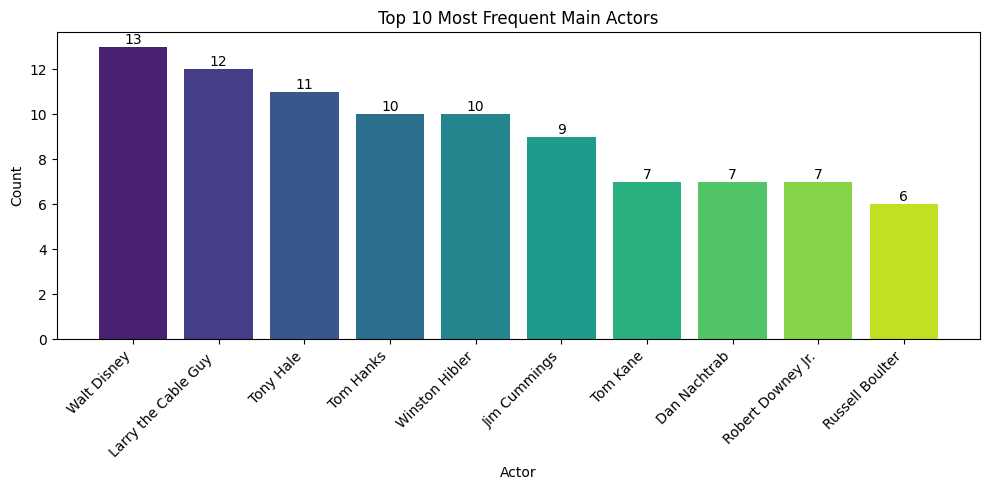

In [55]:
# Extract the first cast member
df['main_actor'] = df['cast'].apply(lambda x: x.split(',')[0] if pd.notna(x) else None)

# Count the most frequent actors
top_actors = df['main_actor'].value_counts().head(10)

# Set a color palette with different colors for each bar
colors = sns.color_palette('viridis', len(top_actors))

# Plotting the bar graph
plt.figure(figsize=(10, 5))
bars = plt.bar(top_actors.index, top_actors.values, color=colors)

# Annotating the bars with the count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval , int(yval), ha='center', va='bottom', fontsize=10, color='black')

# Labeling the plot
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Top 10 Most Frequent Main Actors')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


#### We can see that "Walt Disney" associated with the most content

### 5. What is the typical duration of movies compared to TV shows, and how does this vary by country?

#### for this we first splitting the duration column into separate data points for movies and TV shows, calculating average durations for movies by country, and average seasons for TV shows by country, while handling cases where multiple countries are listed for a single entry

Average Movie Duration by Country (Equal Weight):
country
United States     67.462052
Brazil            49.500000
New Zealand       44.333333
United Kingdom    42.992009
Canada            42.971345
Austria           41.416667
Mexico            40.500000
Tanzania          39.500000
Germany           39.031250
Australia         36.671053
Name: duration_min, dtype: float64


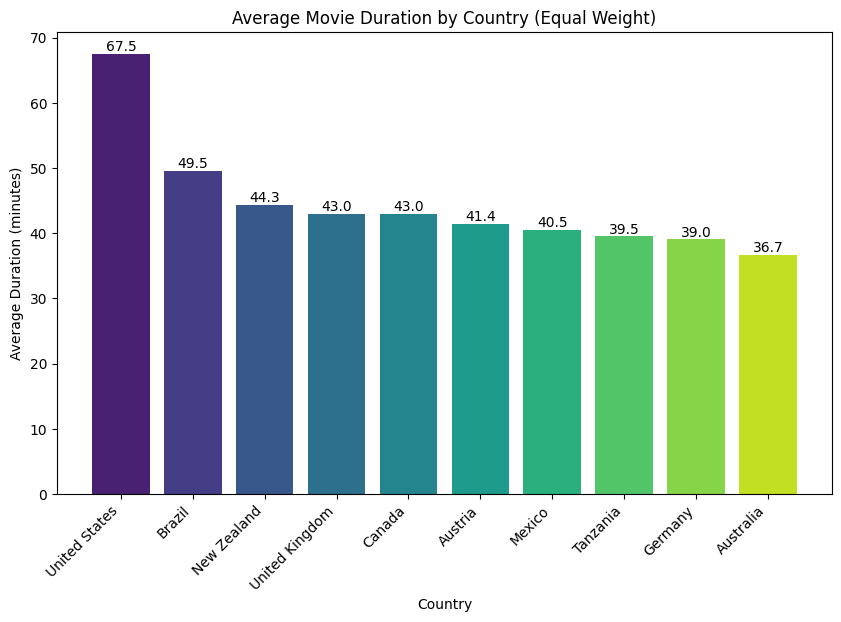

In [62]:
# Clean duration column (assume minutes for Movies, number of seasons for TV Shows)
df['duration_min'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else None)

# Create a new DataFrame to handle multiple countries
expanded_rows = []

for index, row in df[df['type'] == 'Movie'].iterrows():
    if pd.notna(row['country']):  # Check if the country value is not NaN
        countries = row['country'].split(',')
        duration_per_country = row['duration_min'] / len(countries)
        for country in countries:
            expanded_rows.append({'country': country.strip(), 'duration_min': duration_per_country})

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Calculate the average duration by country
average_duration_expanded = expanded_df.groupby('country')['duration_min'].mean().sort_values(ascending=False).head(10)
print("Average Movie Duration by Country (Equal Weight):")
print(average_duration_expanded)

# Plot the average movie duration by country with professional colors
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(average_duration_expanded))  # Using Seaborn color palette
bars = plt.bar(average_duration_expanded.index, average_duration_expanded.values, color=colors)

# Annotate each bar with the value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Country')
plt.title('Average Movie Duration by Country (Equal Weight)')
plt.xticks(rotation=45, ha='right')
plt.show()


#### As we can see from this United States Got the most average movie duration

### Now we do same for the TV Shows

Average Number of Seasons by Country (Equal Weight):
country
United States     2.287154
India             2.000000
Argentina         1.833333
Mexico            1.500000
United Kingdom    1.446843
Ireland           1.046667
Germany           1.000000
Canada            0.981616
Australia         0.863636
France            0.780114
Name: seasons, dtype: float64


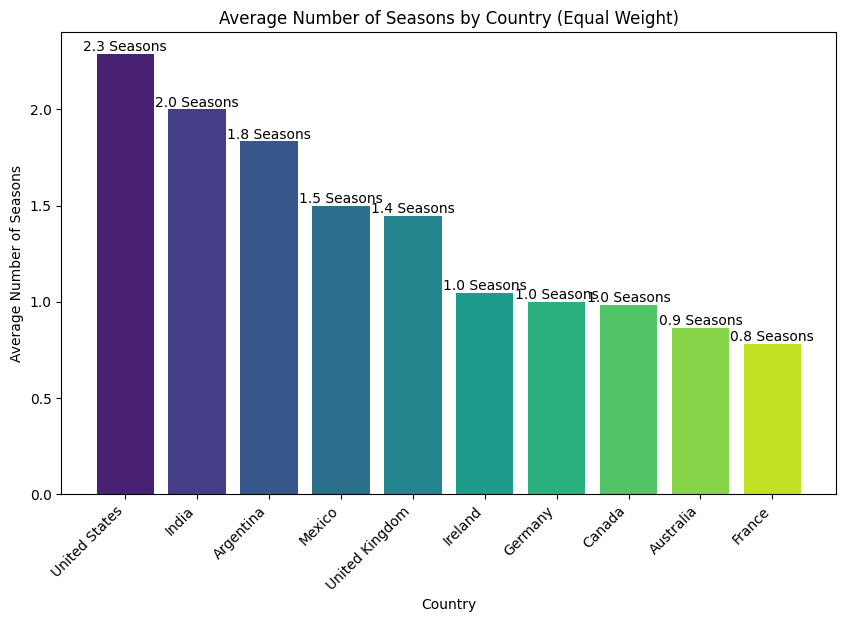

In [67]:
# Filter TV shows
tv_shows_df = df[df['type'] == 'TV Show']

# Expand the country data by splitting on commas and calculating average seasons
expanded_tv_show_rows = []

for index, row in tv_shows_df.iterrows():
    if isinstance(row['country'], str):  # Check if 'country' is a string
        countries = row['country'].split(',')
        seasons_per_country = row['seasons'] / len(countries) if pd.notna(row['seasons']) else None
        for country in countries:
            expanded_tv_show_rows.append({'country': country.strip(), 'seasons': seasons_per_country})

# Create a new DataFrame from the expanded rows
expanded_tv_show_df = pd.DataFrame(expanded_tv_show_rows)

# Calculate the average number of seasons by country
average_seasons_tv_shows_expanded = expanded_tv_show_df.groupby('country')['seasons'].mean().dropna().sort_values(ascending=False).head(10)
print("Average Number of Seasons by Country (Equal Weight):")
print(average_seasons_tv_shows_expanded)

# Plot the average number of seasons by country with professional colors
plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(average_seasons_tv_shows_expanded))  # Using Seaborn color palette
bars = plt.bar(average_seasons_tv_shows_expanded.index, average_seasons_tv_shows_expanded.values, color=colors)

# Annotate each bar with the value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 1)} Seasons', ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.ylabel('Average Number of Seasons')
plt.xlabel('Country')
plt.title('Average Number of Seasons by Country (Equal Weight)')
plt.xticks(rotation=45, ha='right')
plt.show()


#### As we can see from this United States and India Got the most average TV Shows duration

### 6. What are the release trends over time, and are there any noticeable patterns in the types of content released?

<Figure size 1000x600 with 0 Axes>

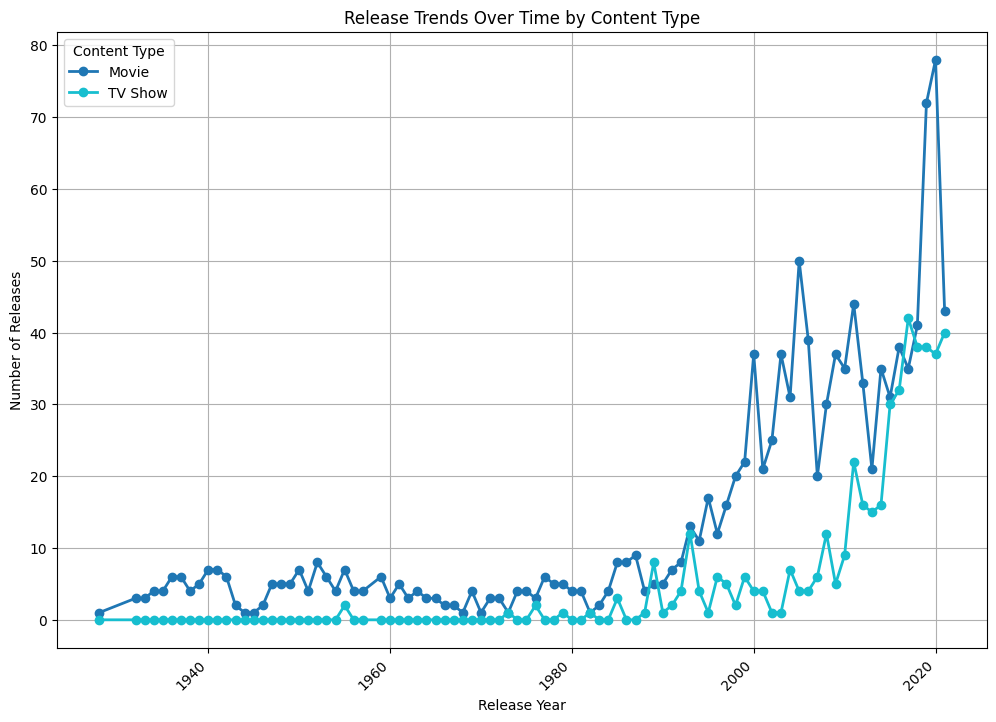

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'release_year' column to datetime if it's not already
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

# Group by release year and type, then count the number of releases
release_trends = df.groupby([df['release_year'].dt.year, 'type']).size().unstack(fill_value=0)

# Plotting the release trends over time
plt.figure(figsize=(10, 6))
release_trends.plot(kind='line', marker='o', linewidth=2, figsize=(12, 8), colormap='tab10', title='Release Trends Over Time by Content Type')

# Labeling the plot
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.legend(title='Content Type')
plt.show()


#### As we can see in the graph there is a rise in the "Movies" Type of content

### 7. How do descriptions correlate with genres or content types, and are there common themes in popular shows?


#### Analyze the frequency of key terms in descriptions by genre or content type to identify common themes and correlations.

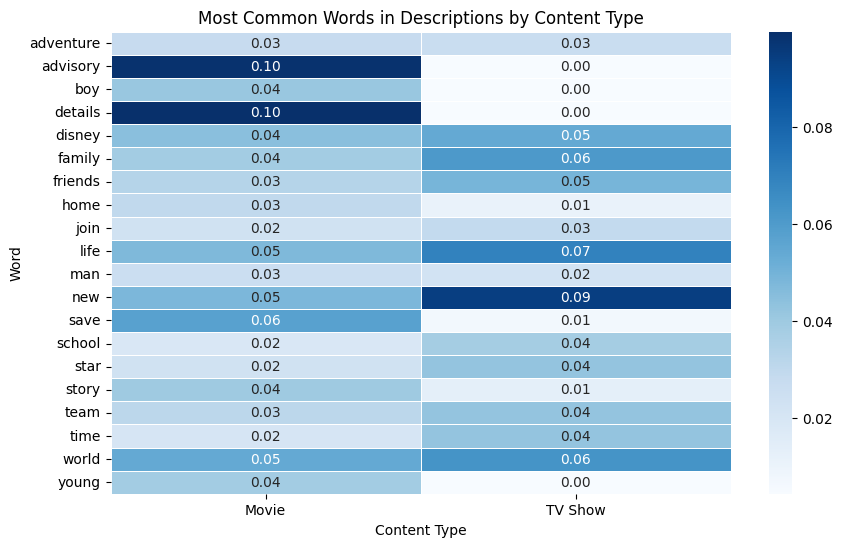

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

# Filter DataFrame to keep only relevant columns
df_filtered = df[['type', 'listed_in', 'description']]

# Use CountVectorizer to analyze word frequency in descriptions by content type
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df_filtered['description'])

# Create DataFrame of word frequencies
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=df_filtered.index)
word_freq_df['type'] = df_filtered['type']

# Calculate average word frequency by content type
average_word_freq = word_freq_df.groupby('type').mean()

# Plot the most common words by content type
plt.figure(figsize=(10, 6))
sns.heatmap(average_word_freq.T, cmap='Blues', annot=True, fmt='.2f', linewidths=.5)
plt.title('Most Common Words in Descriptions by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Word')
plt.show()


#### As we can see the most common words for Movie and TV Shows are different